In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

In [2]:
rossi = load_rossi()

In [3]:
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [5]:
cph = CoxPHFitter()

In [6]:
cph.fit(rossi, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [7]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2021-05-08 07:41:27 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [8]:
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.39
         time fit was run = 2021-05-08 07:42:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.03       0.97       0.03            -0.09             0.03                 0.92                 1.03
fin        -0.33       0.72       0.19            -0.70             0.04                 0.49                 1.05
prio        0.31       1.36       0.17            -0.03             0.64                 0.97                 1.90
wexp       -0.24       0.79       0.21            -0.65             0.17                 0.52                 1.19
age:prio   -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01

              z    p   -log2(p)
covariate                      
age       -0.93 0.35       1.51
fin       -1.73 0.08       3.57
prio       1.80 0.07       3.80
wexp      -1.14 0.26       1.97
age:prio  -1.28 0.20       2.32
---
Concordance = 0.64
Partial AIC = 1328.77
log-likelihood ratio test = 31.99 on 5 df
-log2(p) of ll-ratio test = 17.35

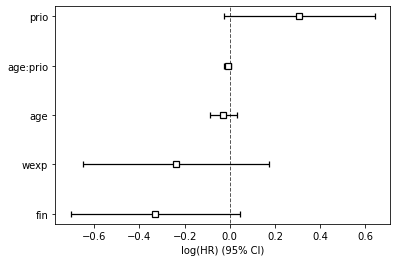

In [14]:
cph.plot()
plt.show()

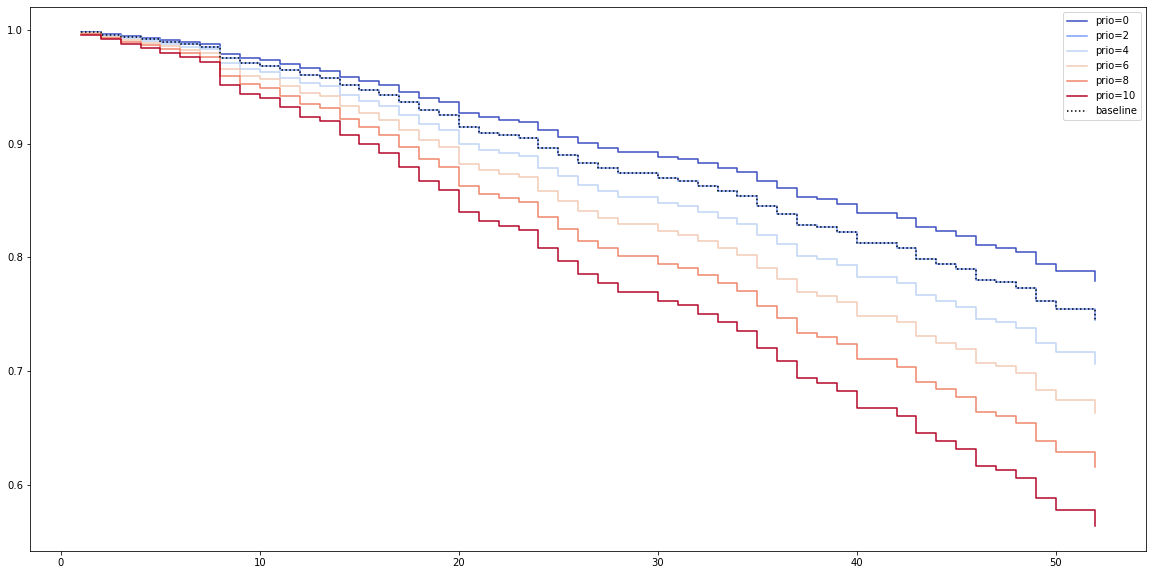

In [19]:
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm', figsize=(20,10))
plt.show()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic      p  -log2(p)
age      km             12.26 <0.005     11.08
         rank           12.77 <0.005     11.47
age:prio km              2.02   0.16      2.69
         rank            2.17   0.14      2.83
fin      km              0.01   0.94      0.09
         rank            0.01   0.92      0.12
prio     km              2.11   0.15      2.77
         rank            2.26   0.13      2.91
wexp     km             10.08 <0.005      9.38
         rank            9.98 <0.005      9.30



1. Variable 'age' failed the non-proportional test: p-value is 0.0004.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0015.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/l

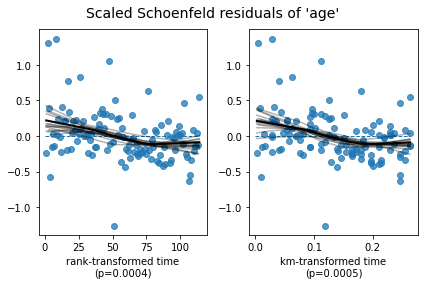

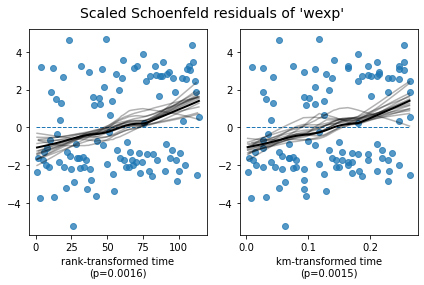

In [25]:
cph.check_assumptions(rossi, p_value_threshold=0.05, show_plots=True)
plt.show()

In [27]:
results = proportional_hazard_test(cph, rossi, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
          test_statistic      p  -log2(p)
age                12.77 <0.005     11.47
age:prio            2.17   0.14      2.83
fin                 0.01   0.92      0.12
prio                2.26   0.13      2.91
wexp                9.98 <0.005      9.30